In [1]:
#importing main packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('C:/Users/susum/Documents/ds_movie_proj/movies_data_cleaned.csv')

**Inspecting the initial data**

In [3]:
df.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Year,Month,Age,Total Runtime (min)
0,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,2015.0,December,8.0,138
1,Avengers: Endgame,After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,2019.0,April,4.0,181
2,Avatar,A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,2009.0,December,14.0,162
3,Black Panther,"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,NaN,NaN,NaN,134
4,Avengers: Infinity War,The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,NaN,NaN,NaN,149


In [4]:
df.shape

(918, 14)

In [5]:
#describe the numerical variables
df['Year'] = df['Year'].fillna(-1).astype(int)
df['Age'] = df['Age'].fillna(-1).astype(int)

df['Year'] = df['Year'].replace(-1, np.nan)
df['Age'] = df['Age'].replace(-1, np.nan)

pd.set_option('display.float_format', lambda x: format(x, ',.2f'))
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Domestic Sales (in $),918.00,"167,746,917.94","104,036,044.97","80,360,843.00","101,607,071.75","132,135,096.00","191,390,485.50","936,662,225.00"
International Sales (in $),918.00,"230,143,435.58","217,601,104.22",260.00,"88,456,200.25","163,881,928.00","288,557,651.00","2,086,738,578.00"
World Sales (in $),918.00,"396,866,825.78","308,262,916.04","81,600,000.00","200,556,355.25","301,941,607.00","475,071,823.50","2,847,246,203.00"
Year,800.00,"2,006.96",8.66,"1,972.00","2,002.00","2,008.00","2,014.00","2,021.00"
Age,800.00,16.04,8.66,2.00,9.00,15.00,21.00,51.00
Total Runtime (min),918.00,116.57,20.88,76.00,100.00,115.00,130.00,201.00


In [6]:
df.dtypes

Title                          object
Movie Info                     object
Distributor                    object
Release Date                   object
Domestic Sales (in $)           int64
International Sales (in $)      int64
World Sales (in $)              int64
Genre                          object
Movie Runtime                  object
License                        object
Year                          float64
Month                          object
Age                           float64
Total Runtime (min)             int64
dtype: object

In [7]:
#information length column
df['info_len']= df['Movie Info'].apply(lambda x: len(x))

In [8]:
#number of genres for each movie
df['genre_num']= df['Genre'].apply(lambda x: len(x.split(',')))

In [9]:
df.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Year,Month,Age,Total Runtime (min),info_len,genre_num
0,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,"2,015.00",December,8.00,138,171,3
1,Avengers: Endgame,After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,"2,019.00",April,4.00,181,221,4
2,Avatar,A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,"2,009.00",December,14.00,162,159,4
3,Black Panther,"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,NaN,NaN,NaN,134,172,3
4,Avengers: Infinity War,The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,NaN,NaN,NaN,149,176,3


In [10]:
df.isnull().sum()

Title                           0
Movie Info                      0
Distributor                     0
Release Date                  118
Domestic Sales (in $)           0
International Sales (in $)      0
World Sales (in $)              0
Genre                           0
Movie Runtime                   0
License                       174
Year                          118
Month                         118
Age                           118
Total Runtime (min)             0
info_len                        0
genre_num                       0
dtype: int64

**Histograms for numerical variables**

Age, runtime and number of genres show a distribution close to normal distribution. Distribution of World Sales is right-skewed.

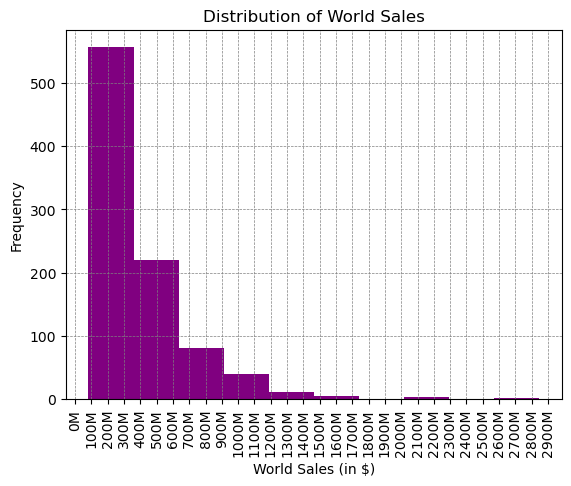

In [11]:
plt.hist(df['World Sales (in $)'], color='purple')
plt.xticks(np.arange(0, 3000000000, 100000000), [str(int(x/1000000))+'M' for x in np.arange(0, 3000000000, 100000000)], rotation=90)
plt.xlabel('World Sales (in $)')
plt.ylabel('Frequency')
plt.title('Distribution of World Sales')
plt.style.use('dark_background')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

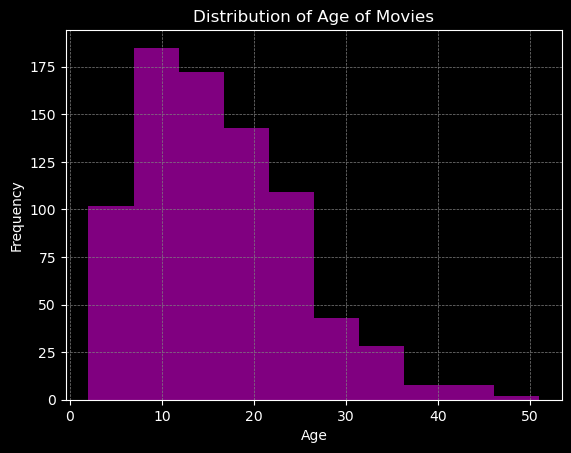

In [12]:
plt.hist(df['Age'], color='purple')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age of Movies')
plt.style.use('dark_background')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

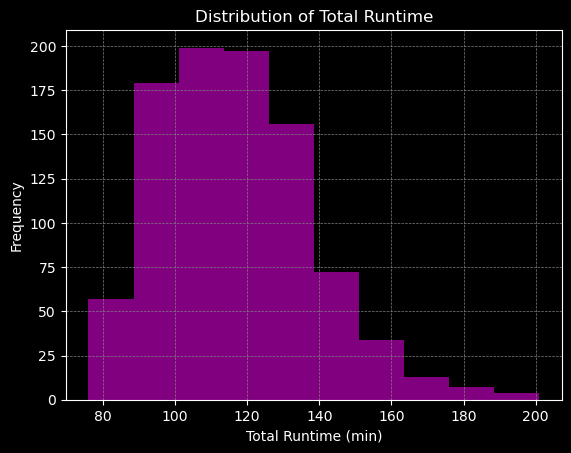

In [13]:
plt.hist(df['Total Runtime (min)'], color='purple')
plt.xlabel('Total Runtime (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Runtime')
plt.style.use('dark_background')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()      

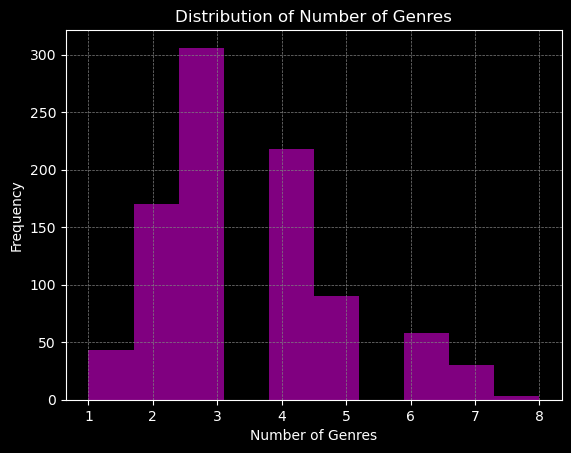

In [14]:
plt.hist(df['genre_num'], color='purple')
plt.xlabel('Number of Genres')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Genres')
plt.style.use('dark_background')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()  

**Boxplot of sales data**

There are some outliers for three of the sales data.

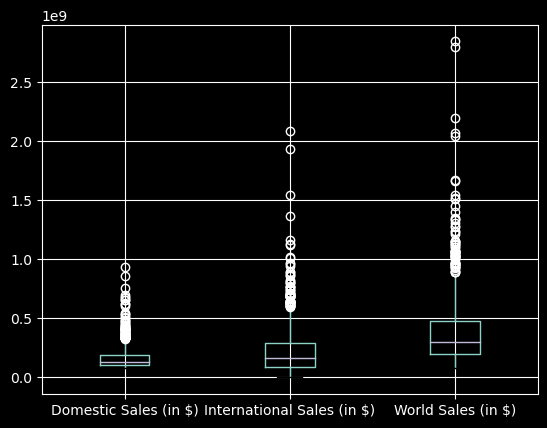

In [15]:
df.boxplot(column=['Domestic Sales (in $)','International Sales (in $)' ,'World Sales (in $)']);

**Correlation between numerical variables**

Domestic, international and world sales are highly correlated with eachother. This is why I will use World Sales to evaluate the sales success of a movie.

In [16]:
corr_matrix = df[['Domestic Sales (in $)', 'International Sales (in $)', 'World Sales (in $)', 'Age', 'Total Runtime (min)', 'info_len', 'genre_num']].corr()
corr_matrix

,Domestic Sales (in $),International Sales (in $),World Sales (in $),Age,Total Runtime (min),info_len,genre_num
Domestic Sales (in $),1.00,0.80,0.90,-0.09,0.28,0.13,0.12
International Sales (in $),0.80,1.00,0.98,-0.25,0.33,0.12,0.15
World Sales (in $),0.90,0.98,1.00,-0.21,0.33,0.13,0.14
Age,-0.09,-0.25,-0.21,1.00,0.00,-0.10,-0.14
Total Runtime (min),0.28,0.33,0.33,0.00,1.00,0.11,-0.21
info_len,0.13,0.12,0.13,-0.10,0.11,1.00,0.08
genre_num,0.12,0.15,0.14,-0.14,-0.21,0.08,1.00


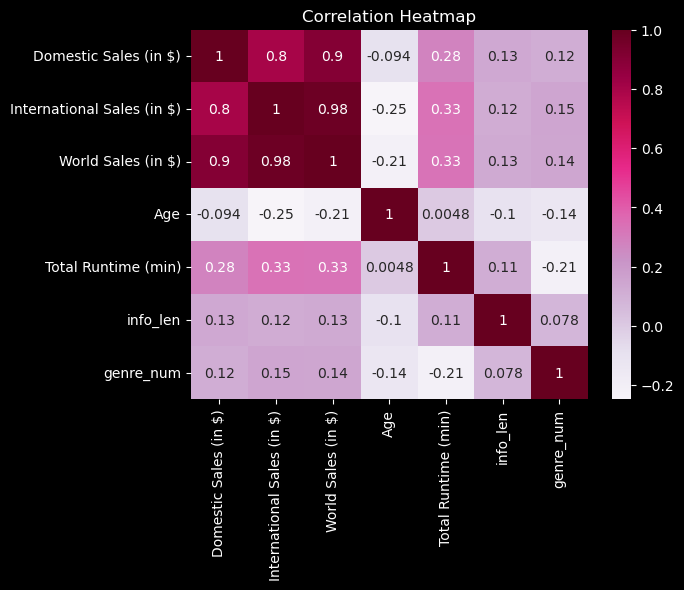

In [17]:
sns.heatmap(corr_matrix, annot=True, cmap='PuRd')
plt.title('Correlation Heatmap')
plt.show()

**Graphs for categorical variables**

Number of movies for each category in the dataset.

In [18]:
df_cat = df[['Distributor','License']]

Graph for Distributor: total =  34


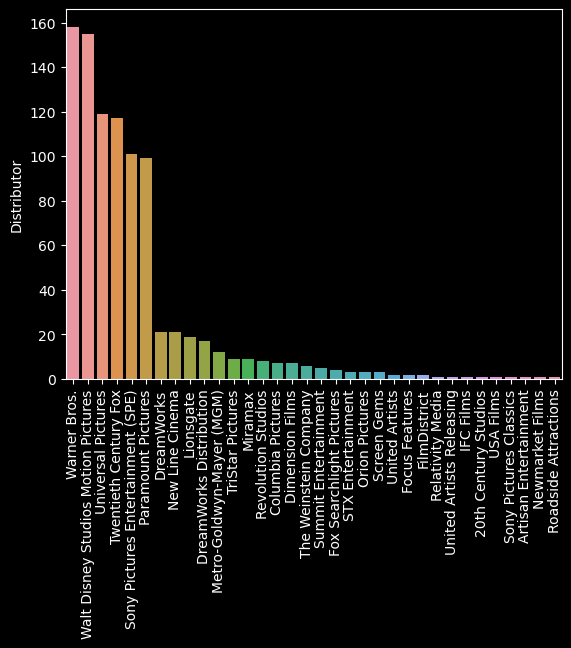

Graph for License: total =  4


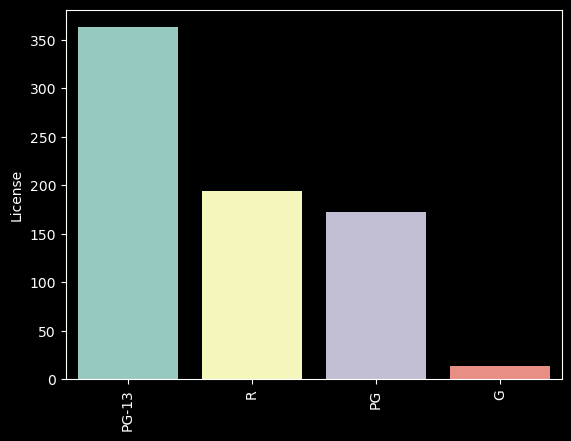

In [19]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s: total =  %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y= cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

**Movie success and seasons**

It is seen that highest saled movies are usually released in summer and spring.

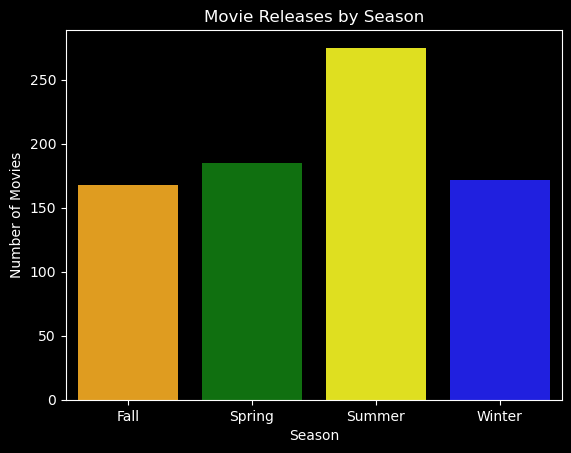

In [20]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

df['Month'] = df['Release Date'].dt.month
df['Season'] = pd.cut(df['Month'], bins=[0, 2, 5, 8, 11, 12], labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter'], ordered=False)

season_counts = df['Season'].value_counts()

season_colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'yellow', 'Fall': 'orange'}

fig, ax = plt.subplots()
sns.barplot(x=season_counts.index, y=season_counts.values, palette=season_colors, ax=ax)

ax.set_xlabel('Season')
ax.set_ylabel('Number of Movies')
ax.set_title('Movie Releases by Season')

plt.show()

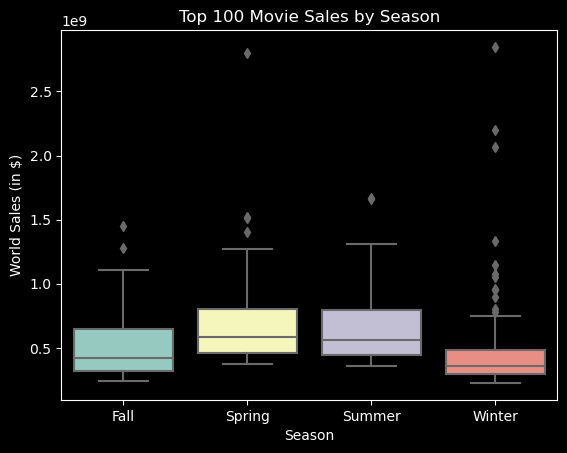

In [21]:
top100_season = df.groupby('Season').apply(lambda x: x.nlargest(100, 'World Sales (in $)')).reset_index(drop=True)

# Create a box plot of the World Sales for the top 100 movies in each season
fig, ax = plt.subplots()
sns.boxplot(x='Season', y='World Sales (in $)', data=top100_season, ax=ax)

# Set the axis labels and title
ax.set_xlabel('Season')
ax.set_ylabel('World Sales (in $)')
ax.set_title('Top 100 Movie Sales by Season')

# Show the plot
plt.show()

**Movie sales for each genre**

Sci-fi, adventure and fantasy are the top three most popular genres regarding world sales.

In [22]:
import ast
df['Genre']= df['Genre'].apply(lambda x: ast.literal_eval(x))

In [23]:
Genre= []
for i in range(df.shape[0]):
    Genre.extend(df.loc[i,'Genre'])
Genre[:7]
pd.Series(Genre).unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Drama', 'Fantasy', 'Romance',
       'Animation', 'Comedy', 'Family', 'Musical', 'Crime', 'Thriller',
       'War', 'Mystery', 'Biography', 'Horror', 'Sport', 'Music',
       'History', 'Western', 'Documentary'], dtype=object)

In [24]:
def subset_genre(g):
    mask=df['Genre'].apply(lambda x: g in x)
    return df[mask]

In [25]:
genre_data= pd.DataFrame({'genre':pd.Series(Genre).unique()})
genre_data['num_movie']= genre_data['genre'].apply(lambda g: subset_genre(g).shape[0])
genre_data['average_sale']= genre_data['genre'].apply(lambda g: subset_genre(g)['World Sales (in $)'].mean())
genre_data['total_sale']= genre_data['genre'].apply(lambda g: subset_genre(g)['World Sales (in $)'].sum())
genre_data = genre_data.sort_values(by='average_sale', ascending=False)
genre_data = genre_data.reset_index(drop=True).set_index(pd.Index(range(1, len(genre_data)+1)))
genre_data

,genre,num_movie,average_sale,total_sale
1,Sci-Fi,228,"537,513,491.31",122553076019
2,Adventure,432,"531,181,019.33",229470200349
3,Fantasy,227,"491,882,626.97",111657356323
4,Animation,140,"476,451,290.65",66703180691
5,Action,396,"475,666,143.34",188363792761
6,Musical,51,"449,595,165.86",22929353459
7,Family,227,"433,959,077.25",98508710535
8,Thriller,230,"360,633,770.33",82945767175
9,Mystery,87,"358,360,845.00",31177393515
10,Drama,300,"329,879,297.20",98963789161


Text(0.5, 1.0, 'Number of Movies by Genres')

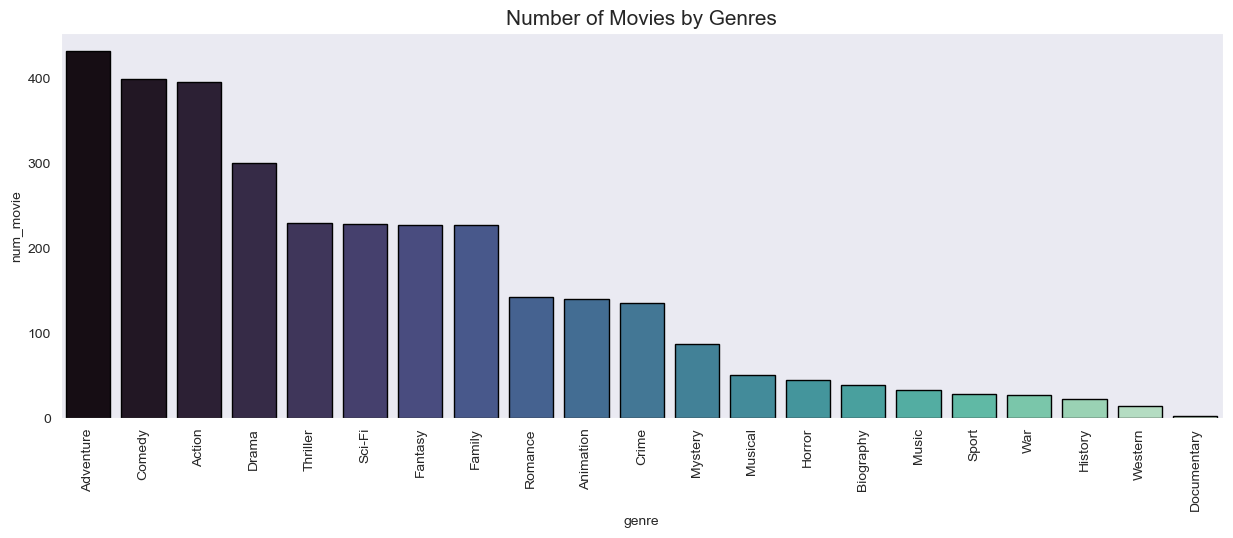

In [26]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='genre', y='num_movie', data=genre_data.sort_values('num_movie', ascending=False),
            palette='mako', edgecolor='black', color='#C4A4CC', ax=ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Number of Movies by Genres', fontsize=15)

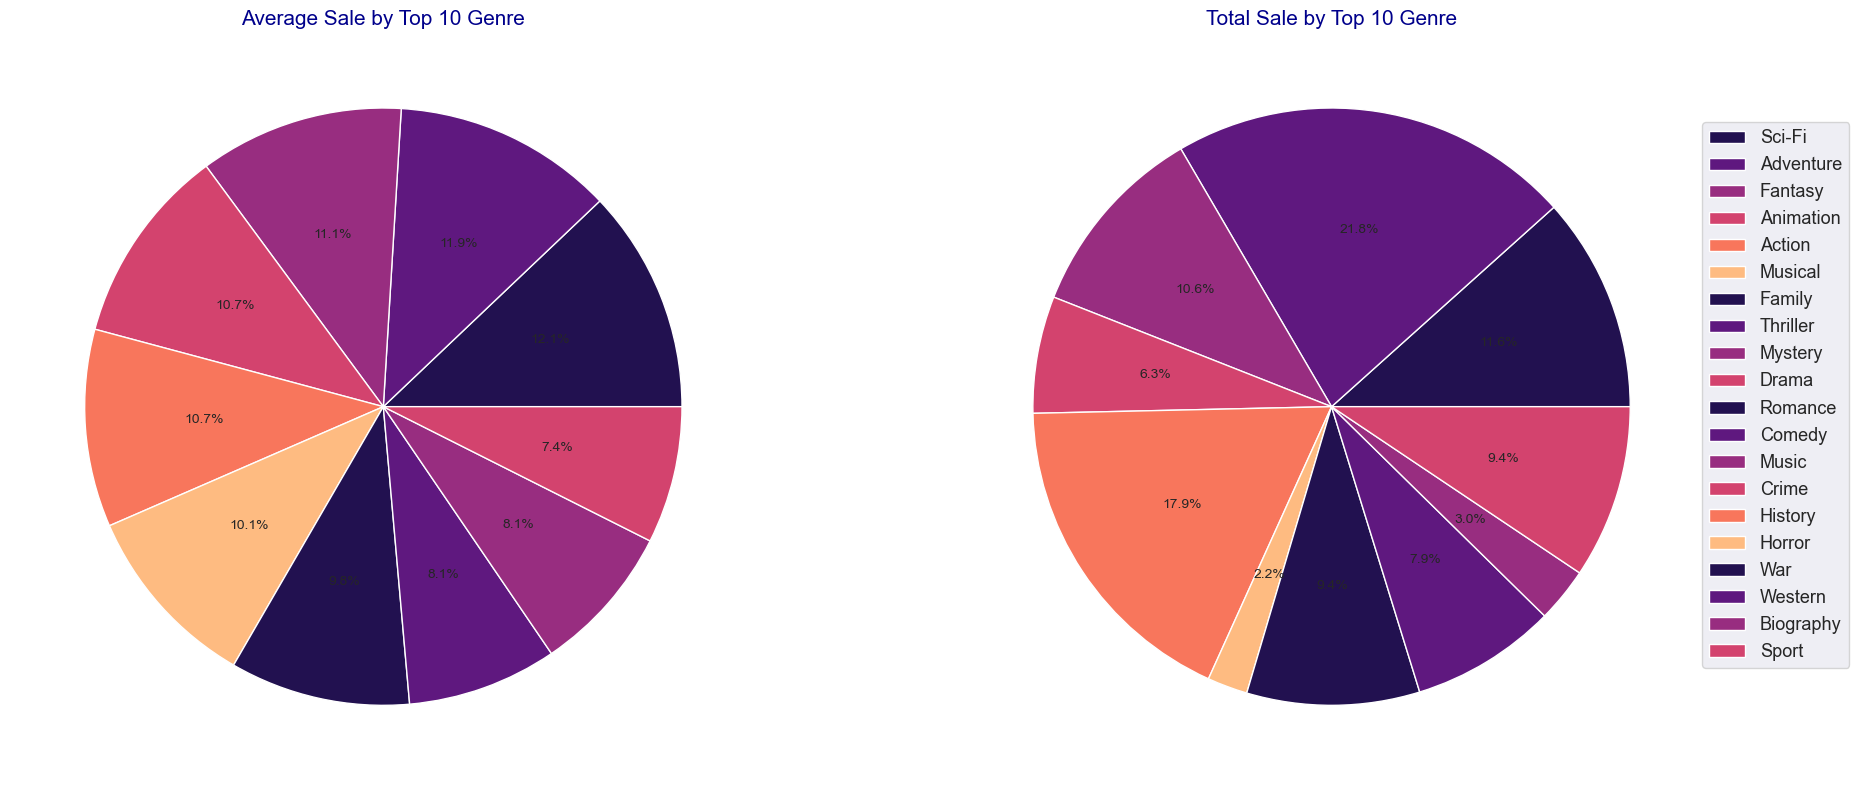

In [27]:
fig, ax= plt.subplots(ncols=2, figsize=(20,8))
color = sns.color_palette('magma')
ax[0].pie(x=genre_data['average_sale'].head(10), colors=color,autopct='%1.1f%%')
ax[1].pie(x=genre_data['total_sale'].head(10), colors=color,autopct='%1.1f%%')
ax[0].set_title('Average Sale by Top 10 Genre', color='darkblue', fontsize=15)
ax[1].set_title('Total Sale by Top 10 Genre',color='darkblue', fontsize=15)
fig.legend(genre_data['genre'],loc='right', fontsize=13)
fig.tight_layout();

**Wordcloud for the movie information texts**

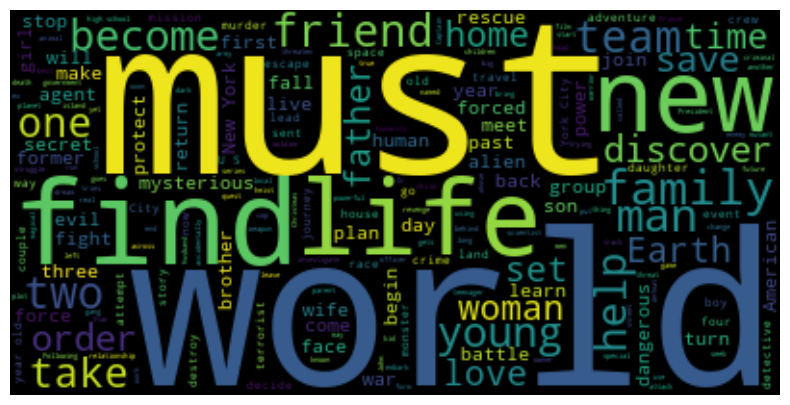

In [28]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all the movie info texts into one string
text = " ".join(info for info in df['Movie Info'])

# Create and generate a word cloud image
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

In [29]:
df.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Year,Month,Age,Total Runtime (min),info_len,genre_num,Season
0,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"[Action, Adventure, Sci-Fi]",2 hr 18 min,PG-13,"2,015.00",12.00,8.00,138,171,3,Winter
1,Avengers: Endgame,After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"[Action, Adventure, Drama, Sci-Fi]",3 hr 1 min,PG-13,"2,019.00",4.00,4.00,181,221,4,Spring
2,Avatar,A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"[Action, Adventure, Fantasy, Sci-Fi]",2 hr 42 min,PG-13,"2,009.00",12.00,14.00,162,159,4,Winter
3,Black Panther,"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaT,700426566,647171407,1347597973,"[Action, Adventure, Sci-Fi]",2 hr 14 min,NaN,NaN,NaN,NaN,134,172,3,NaN
4,Avengers: Infinity War,The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaT,678815482,1369544272,2048359754,"[Action, Adventure, Sci-Fi]",2 hr 29 min,NaN,NaN,NaN,NaN,149,176,3,NaN


**Distributor informations**

Top 6 distributors make most of the sales.

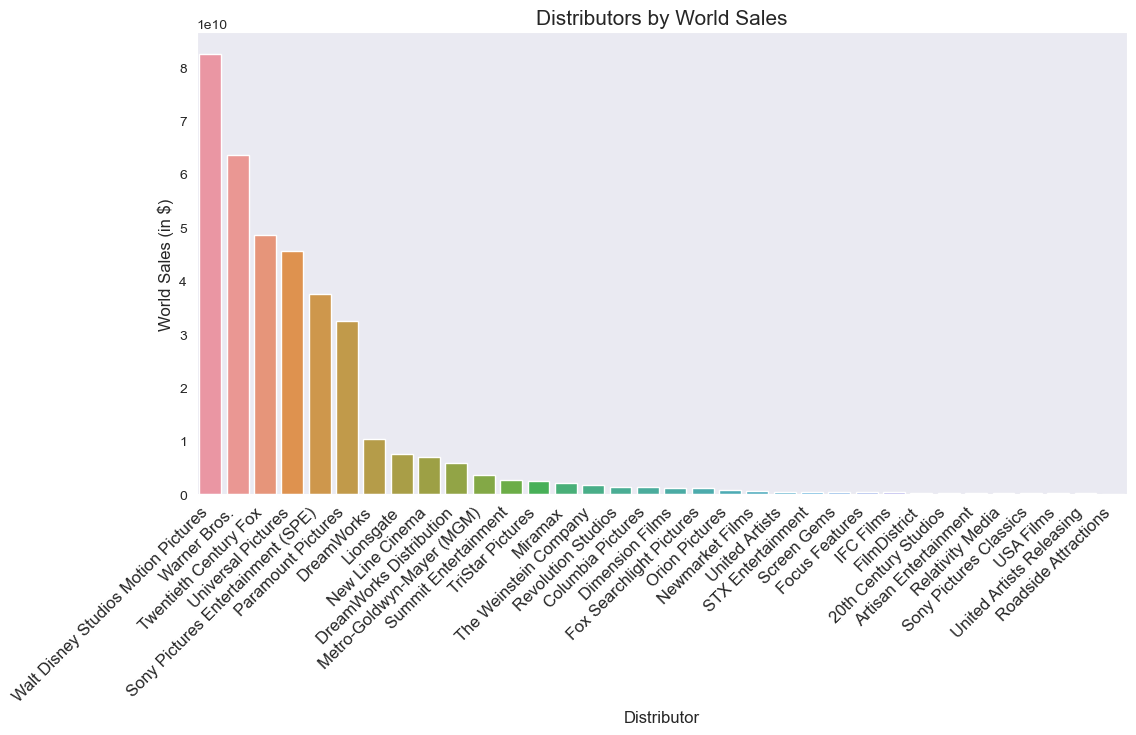

In [30]:
distributors_sales = df.groupby('Distributor')['World Sales (in $)'].sum().reset_index()

distributors_sales = distributors_sales.sort_values('World Sales (in $)', ascending=False)
sns.set_style('dark')
plt.figure(figsize=(12, 6))
sns.barplot(x='Distributor', y='World Sales (in $)', data=distributors_sales)
plt.title('Distributors by World Sales', fontsize=15)
plt.xlabel('Distributor', fontsize=12)
plt.ylabel('World Sales (in $)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

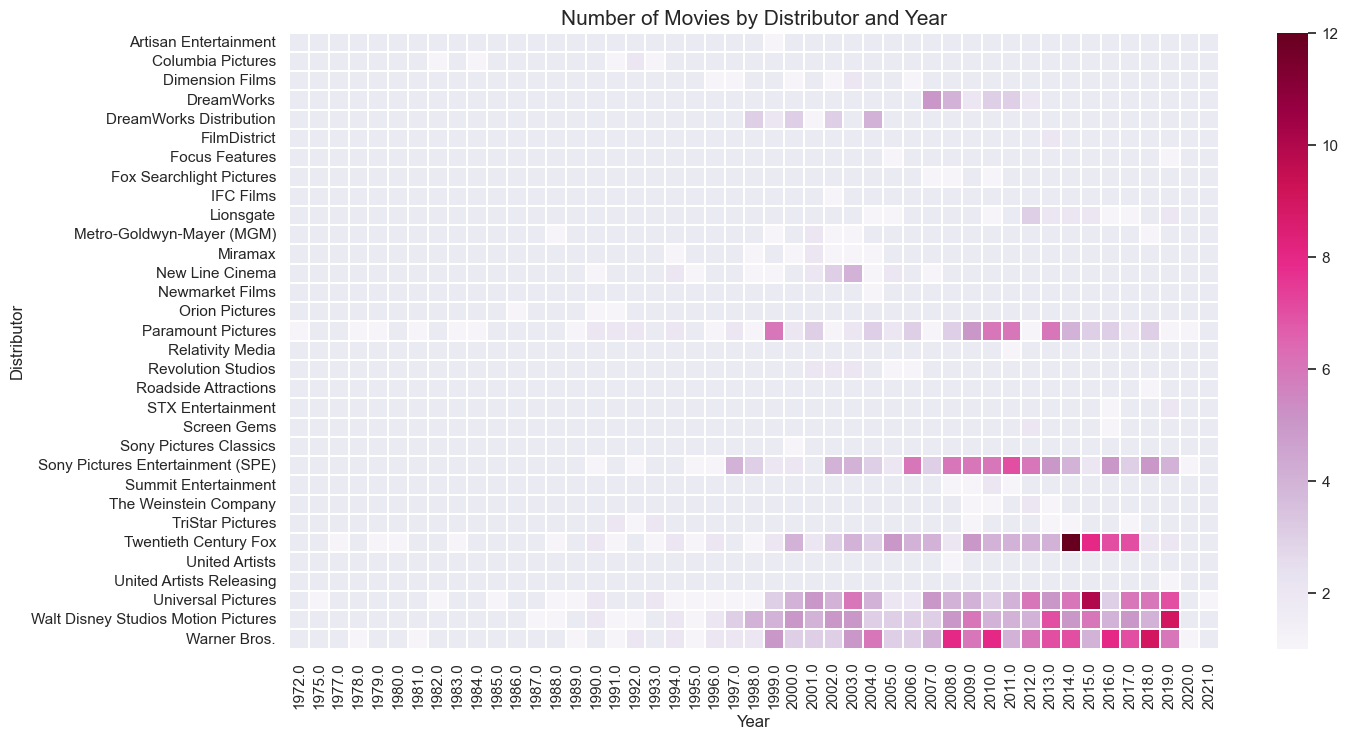

In [31]:
distributor_year_counts = df.pivot_table(index='Distributor', columns='Year', values='Title', aggfunc='count')

sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(distributor_year_counts, cmap='PuRd', linewidths=0.05, linecolor='white')
plt.title('Number of Movies by Distributor and Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Distributor', fontsize=12)
plt.show()

**Licence informations**

PG-13 movies are sold the most.

G – General Audiences

PG – Parental Guidance Suggested

PG-13 – Parents Strongly Cautioned

R – Restricted

In [32]:
pd.options.display.max_columns = None

pivot_table = pd.pivot_table(df, index=['Distributor','License'], values='World Sales (in $)')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pivot_table)

World Sales (in $)
Distributor                         License                    
Artisan Entertainment               R            248,639,099.00
Columbia Pictures                   R            212,033,346.00
Dimension Films                     PG           158,412,518.00
                                    PG-13        199,467,918.50
                                    R            169,081,413.33
DreamWorks                          PG           547,328,911.83
                                    PG-13        525,683,295.33
                                    R            195,702,963.00
DreamWorks Distribution             PG           436,313,804.00
                                    PG-13        232,180,822.80
                                    R            341,053,681.80
FilmDistrict                        PG-13        161,919,318.00
                                    R            170,270,201.00
Focus Features                      PG           237,860,050.00
                                    R            178,062,759.00
Fox Searchlight Pictures            PG-13        232,372,681.00
                                    R            353,904,294.00
IFC Films                           PG           368,744,044.00
Lionsgate                           PG-13        513,028,817.45
                                    R            257,384,703.00
Metro-Goldwyn-Mayer (MGM)           PG-13        283,233,561.75
                                    R            351,692,268.00
Miramax                             PG           147,934,180.00
                                    PG-13        243,481,237.00
                                    R            238,569,959.00
New Line Cinema                     PG           585,674,415.50
                                    PG-13        412,767,659.20
                                    R            198,961,553.80
Newmarket Films                     R            612,054,506.00
Paramount Pictures                  G            115,784,260.50
                                    PG           295,392,547.44
                                    PG-13        449,330,680.43
                                    R            194,342,810.79
Relativity Media                    R            226,904,017.00
Revolution Studios                  PG           131,176,265.00
                                    PG-13        201,418,779.40
                                    R            172,989,651.00
Roadside Attractions                PG            86,086,881.00
STX Entertainment                   PG-13        125,856,180.00
                                    R            170,749,836.00
Screen Gems                         PG-13        146,092,538.50
                                    R            157,761,002.00
Sony Pictures Classics              PG-13        213,525,736.00
Sony Pictures Entertainment (SPE)   PG           293,324,092.25
                                    PG-13        432,555,273.22
                                    R            228,397,659.45
Summit Entertainment                PG-13        545,831,897.20
The Weinstein Company               PG-13        177,313,795.00
                                    R            352,829,722.50
TriStar Pictures                    PG           164,954,938.50
                                    R            308,797,221.00
Twentieth Century Fox               G            362,569,888.33
                                    PG           459,606,065.33
                                    PG-13        444,121,056.23
                                    R            372,686,848.74
United Artists                      PG-13        201,545,517.00
United Artists Releasing            PG           203,783,845.00
Universal Pictures                  PG           562,881,969.56
                                    PG-13        409,450,280.28
                                    R            258,369,609.21
Walt Disney Studios Motion Pictures G            564,573,511.44
             

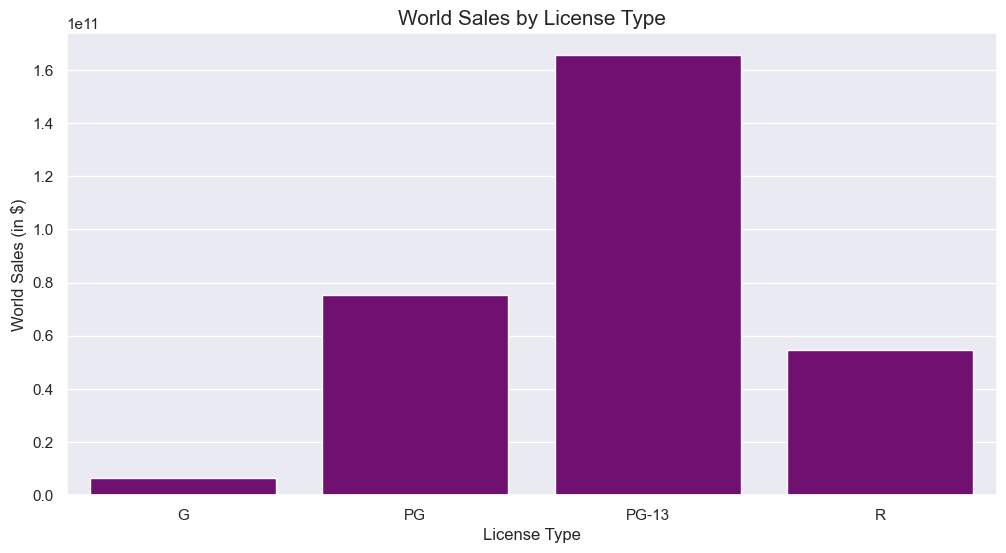

In [33]:
sales_by_license = df.groupby('License')['World Sales (in $)'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='License', y='World Sales (in $)', data=sales_by_license, color='purple')

plt.title('World Sales by License Type', fontsize=15)
plt.xlabel('License Type', fontsize=12)
plt.ylabel('World Sales (in $)', fontsize=12)

# show the plot
plt.show()

**World Sales by Total Runtime**

Movies between 2 hours and 2.5 hours long are the most popular.

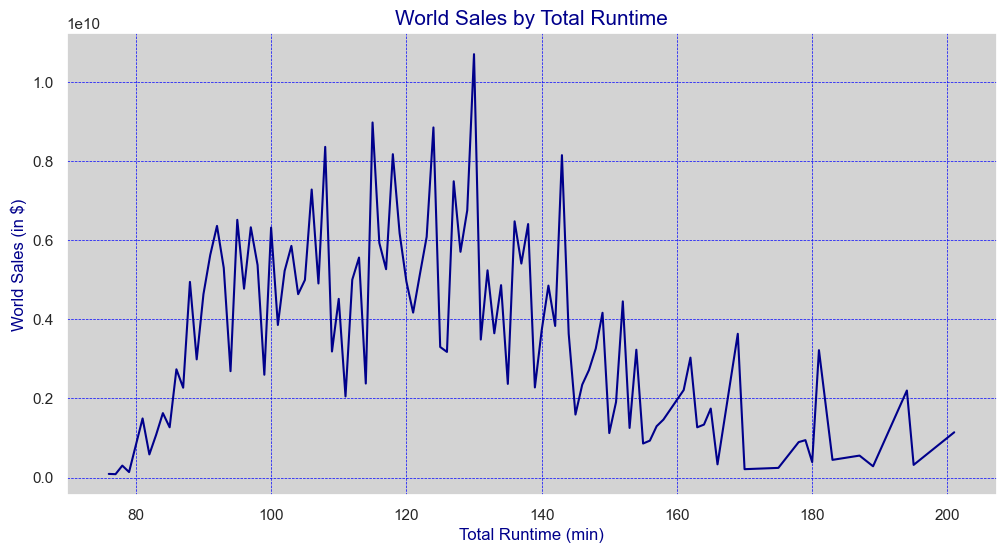

In [34]:
sales_by_runtime = df.groupby('Total Runtime (min)').agg({'World Sales (in $)': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Total Runtime (min)', y='World Sales (in $)', data=sales_by_runtime, color='darkblue')

plt.title('World Sales by Total Runtime', fontsize=15, color='darkblue')
plt.xlabel('Total Runtime (min)', fontsize=12, color='darkblue')
plt.ylabel('World Sales (in $)', fontsize=12, color='darkblue')

plt.gca().set_facecolor('lightgray')
plt.grid(color='blue', linestyle='--', linewidth=0.5)

# show the plot
plt.show()

In [35]:
series_df = df[df['Title'].str.contains(":")]
series_df = series_df.sort_values('World Sales (in $)', ascending=False)
series_df

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Year,Month,Age,Total Runtime (min),info_len,genre_num,Season
1,Avengers: Endgame,After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"[Action, Adventure, Drama, Sci-Fi]",3 hr 1 min,PG-13,"2,019.00",4.00,4.00,181,221,4,Spring
0,Star Wars: Episode VII - The Force Awakens,"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"[Action, Adventure, Sci-Fi]",2 hr 18 min,PG-13,"2,015.00",12.00,8.00,138,171,3,Winter
4,Avengers: Infinity War,The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaT,678815482,1369544272,2048359754,"[Action, Adventure, Sci-Fi]",2 hr 29 min,NaN,NaN,NaN,NaN,149,176,3,NaN
5,Spider-Man: No Way Home,"With Spider-Man's identity now revealed, Peter...",Sony Pictures Entertainment (SPE),NaT,675813257,868642706,1544455963,"[Action, Adventure, Fantasy, Sci-Fi]",2 hr 28 min,NaN,NaN,NaN,NaN,148,215,4,NaN
20,Avengers: Age of Ultron,When Tony Stark and Bruce Banner try to jump-s...,Walt Disney Studios Motion Pictures,2015-04-22,459005868,943803672,1402809540,"[Action, Adventure, Sci-Fi]",2 hr 21 min,PG-13,"2,015.00",4.00,8.00,141,224,3,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,Star Trek IV: The Voyage Home,"To save Earth from an alien probe, Admiral Jam...",Paramount Pictures,NaT,109713132,109713132,109713132,"[Action, Adventure, Comedy, Sci-Fi]",1 hr 59 min,NaN,NaN,NaN,NaN,119,193,4,NaN
914,Jimmy Neutron: Boy Genius,An eight-year-old boy genius and his friends m...,Paramount Pictures,2001-12-21,80936232,22056304,102992536,"[Action, Adventure, Animation, Comedy, Family,...",1 hr 22 min,NaN,"2,001.00",12.00,22.00,82,111,6,Winter
848,Anchorman: The Legend of Ron Burgundy,Ron Burgundy is San Diego's top-rated newsman ...,DreamWorks Distribution,2004-07-09,85288303,5421064,90709367,[Comedy],1 hr 34 min,PG-13,"2,004.00",7.00,19.00,94,199,1,Summer
831,The Naked Gun 2½: The Smell of Fear,Lieutenant Frank Drebin discovers that his ex-...,Paramount Pictures,1991-06-28,86930411,86930411,86930411,"[Comedy, Crime]",1 hr 25 min,NaN,"1,991.00",6.00,32.00,85,139,2,Summer


Avengers series don't lose their fame as the years pass.

In [36]:
avengers_df = df[df['Title'].str.contains('Avengers')]
avengers_df = avengers_df.sort_values('World Sales (in $)', ascending=False)
avengers_sales = avengers_df[['Title', 'Year', 'World Sales (in $)']]
avengers_sales

,Title,Year,World Sales (in $)
1,Avengers: Endgame,"2,019.00",2797501328
4,Avengers: Infinity War,NaN,2048359754
8,The Avengers,"2,012.00",1518815515
20,Avengers: Age of Ultron,"2,015.00",1402809540


Star Wars movies are not able to continue their success in theaters.

In [37]:
star_df = df[df['Title'].str.contains('Star Wars')]
star_df = star_df.sort_values('World Sales (in $)', ascending=False)
star_sales = star_df[['Title', 'Year', 'World Sales (in $)']]
star_sales

,Title,Year,World Sales (in $)
0,Star Wars: Episode VII - The Force Awakens,"2,015.00",2069521700
9,Star Wars: Episode VIII - The Last Jedi,"2,017.00",1332698830
14,Star Wars: Episode IX - The Rise of Skywalker,"2,019.00",1074149279
13,Rogue One: A Star Wars Story,"2,016.00",1056057720
18,Star Wars: Episode I - The Phantom Menace,"1,999.00",1027082707
44,Star Wars: Episode III - Revenge of the Sith,"2,005.00",868390560
19,Star Wars: Episode IV - A New Hope,"1,977.00",775398007
81,Star Wars: Episode II - Attack of the Clones,"2,002.00",653779970
94,Star Wars: Episode V - The Empire Strikes Back,"1,980.00",538375067
83,Star Wars: Episode VI - Return of the Jedi,"1,983.00",475106177


In [40]:
df.to_csv("C:/Users/susum/Documents/ds_movie_proj/eda_data.csv")